<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Subgraph" data-toc-modified-id="Subgraph-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Subgraph</a></span></li></ul></div>

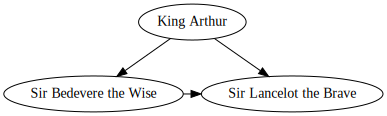

In [1]:
import graphviz

dot = graphviz.Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

dot

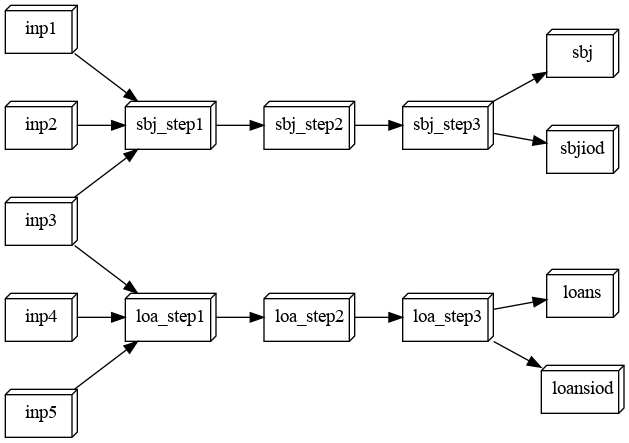

In [115]:
from IPython.display import Image
import networkx as nx

edges = [
    ('inp1', 'sbj_step1'),
    ('inp2', 'sbj_step1'),
    ('inp3', 'sbj_step1'),
    ('sbj_step1','sbj_step2'),
    ('sbj_step2','sbj_step3'),
    ('inp3', 'loa_step1'),
    ('inp4', 'loa_step1'),
    ('inp5', 'loa_step1'),
    ('loa_step1', 'loa_step2'),
    ('loa_step2', 'loa_step3'),
    ('sbj_step3', 'sbj'),
    ('sbj_step3', 'sbjiod'),
    ('loa_step3', 'loans'),
    ('loa_step3', 'loansiod'),
    ('inp1', 'sbj_step1'),
]

G = nx.DiGraph()
G.add_edges_from(edges)
A = nx.nx_agraph.to_agraph(G)

A.draw(
    'test.png', 
    prog='dot', 
    args='-Gnodesep=0.5 -Gfont_size=100 -Gsplines=true -Goverlap=scalexy -Nshape=box3d -Grankdir=LR'
      )

Image('test.png')

# Subgraph

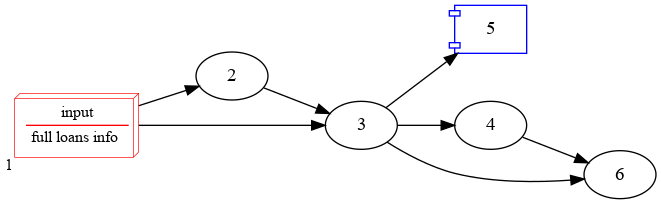

In [352]:
import pygraphviz as pgv
# strict (no parallel edges)
# digraph
# with attribute rankdir set to 'LR'
A = pgv.AGraph(
    directed=True, 
    strict=False, 
    rankdir="LR",
    ranksep=.6,
    nodesep=.5,
    splines=True,
    font_size=100,
    overlap="scalexy"
)
# add nodes
A.add_node(1, color="red", shape="box3d", fontsize=12, 
           label="<<TABLE border='0'><TR><TD>input</TD></TR> <hr /> <TR> <TD>full loans info </TD></TR></TABLE>>", 
           xlabel="1", outputorder="edgefirst", style="setlinewidth(.5)")
A.add_node(5, color="blue", shape="component")
# add edges
A.add_edge(1, 2)
A.add_edge(2, 3)
A.add_edge(1, 3)
A.add_edge(3, 4)
A.add_edge(3, 5)
A.add_edge(3, 6)
A.add_edge(4, 6)
A.draw("graph.png", prog="dot")
Image("graph.png")

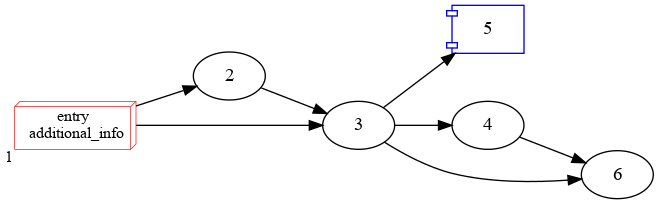

In [188]:
import pygraphviz as pgv
# strict (no parallel edges)
# digraph
# with attribute rankdir set to 'LR'
A = pgv.AGraph(
    directed=True, 
    strict=False, 
    rankdir="LR",
    ranksep=.6,
    nodesep=.5,
    splines=True,
    font_size=100,
    overlap="scalexy"
)
# A.node_attr['style']='invis'
# A.edge_attr['style']='invis'
# add nodes
A.add_node(1, color="red", shape="box3d", fontsize=12, label="entry \n additional_info", xlabel="1", outputorder="edgefirst", style="setlinewidth(.5)", ratio="10.0")
A.add_node(5, color="blue", shape="component")
# add edges
A.add_edge(1, 2)
A.add_edge(2, 3)
A.add_edge(1, 3)
A.add_edge(3, 4)
A.add_edge(3, 5)
A.add_edge(3, 6)
A.add_edge(4, 6)
A.draw("graph.png", prog="dot")
Image("graph.png")

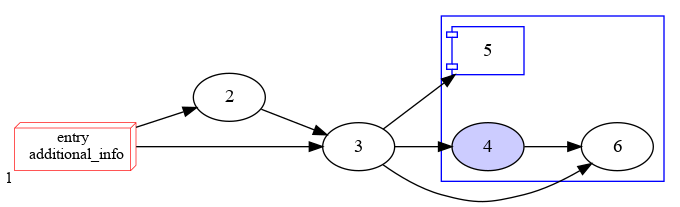

In [189]:
# make a subgraph with rank='same'
B = A.add_subgraph([4, 5, 6], name="cluster_s1", rank="same") # subgrapf whose name starts with cluster given special treatment
n = B.get_node(4)
n.attr['style'] = 'filled'
n.attr['fillcolor'] = "#CCCCFF"
B.node_attr['color']='blue'
A.draw("subgraph.png", prog="dot",)
Image("subgraph.png")

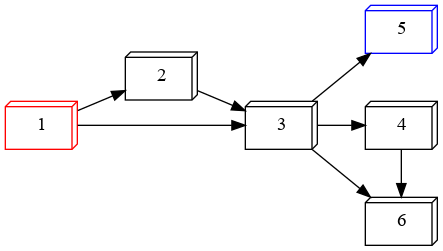

In [90]:
# make a subgraph with rank='same'
A.add_subgraph([4, 5, 6], name="s1", rank="same")
A.draw("subgraph.png", prog="dot",args='-Gnodesep=0.5 -Gfont_size=100 -Gsplines=true -Goverlap=scalexy -Nshape=box3d')
Image("subgraph.png")

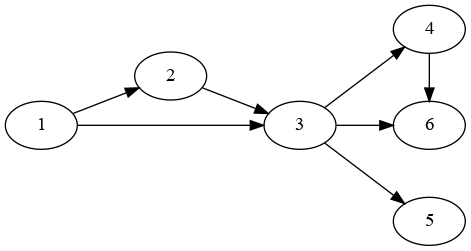

In [163]:
A = pgv.AGraph(
    directed=True, 
    strict=False, 
    rankdir="LR",
    ranksep=.6,
    nodesep=.5,
    splines=True,
    font_size=100,
    overlap="scalexy"
)
A.node_attr['color'] ='black'
A.add_edge(1, 2)
A.add_edge(2, 3)
A.add_edge(1, 3)
A.add_edge(3, 4)
A.add_edge(3, 5)
A.add_edge(3, 6)
A.add_edge(4, 6)
B = A.add_subgraph([4,5,6], rank='same', name='clust', label="cluster_1", color='red')
B.node_attr['color'] = 'blue'
A.draw("graph.png", prog="dot")
Image("graph.png")

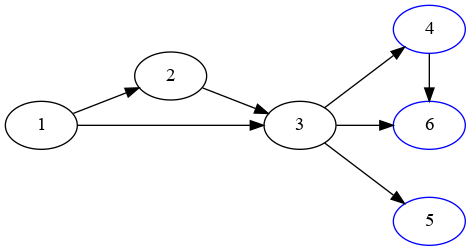

In [173]:
A = pgv.AGraph(
    directed=True, 
    strict=False, 
    rankdir="LR",
    ranksep=.6,
    nodesep=.5,
    splines=True,
    font_size=100,
    overlap="scalexy"
)
A.node_attr['color'] ='black'
A.add_edge(1, 2)
A.add_edge(2, 3)
A.add_edge(1, 3)
A.add_edge(3, 4)
A.add_edge(3, 5)
A.add_edge(3, 6)
A.add_edge(4, 6)
B = A.add_subgraph([4,5,6], rank='same')
for node in B.nodes():
    node.attr['color'] = 'blue'
A.draw("graph.png", prog="dot")
Image("graph.png")

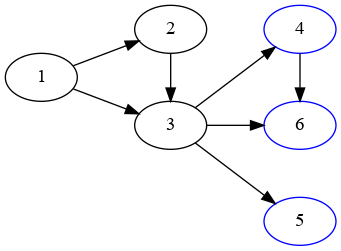

In [5]:
import pygraphviz as pgv
from IPython.display import Image
A = pgv.AGraph(
    directed=True, 
    strict=False, 
    rankdir="LR",
    ranksep=.6,
    nodesep=.5,
    splines=True,
    font_size=100,
    overlap="scalexy",
    newrank=True
)
A.node_attr['color'] ='black'
A.add_edge(1, 2)
A.add_edge(2, 3)
A.add_edge(1, 3)
A.add_edge(3, 4)
A.add_edge(3, 5)
A.add_edge(3, 6)
A.add_edge(4, 6)
B = A.add_subgraph([4,5,6], rank='same')
for node in B.nodes():
    node.attr['color'] = 'blue'
C = A.add_subgraph([2,3], rank='same')
A.draw("graph.png", prog="dot")
Image("graph.png")

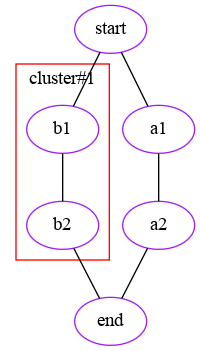

In [164]:
A = pgv.AGraph()
A.node_attr["color"] = "purple"
A.node_attr["shape"] = "oval"

# make a subgraph/cluster
B = A.add_subgraph(name="cluster_1")
B.graph_attr["color"]="lightgrey"
B.graph_attr["label"]="cluster#1"
B.node_attr["color"] = "red"
B.node_attr["shape"] = "triangle"
B.add_edge("b1","b2")

#Create and connect nodes
A.add_edge("start", "a1")
A.add_edge("a1", "a2")
A.add_edge("a2", "end")

A.add_edge("start", "b1")
A.add_edge("b2", "end") 

#generate png file
A.draw("subgraph.png", prog="dot") 
Image('subgraph.png')